# ---------------------------------------------------
# Analyses demandées par Laurent :
# ---------------------------------------------------

#### 1/ Récupération des données
#### 2/ Nettoyage
#### 3/ Exploration

# Objectifs : 
## A / Réalisation d'une jonction entre tables via une table de liaison
## B / Analyse de données
## C / Présentation COPIL

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Chargement des modules :

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1 / Chargement des données :
### df_erp
### df_liaison
### df_web

In [4]:
# ********************************************************
# Chargement des données de df_erp :
df_erp = pd.read_excel("erp.xlsx")

C:\Users\cyril\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df_erp.sort_values('product_id',ascending= True)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


<AxesSubplot:ylabel='None'>

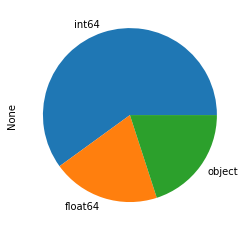

In [6]:
df_erp.dtypes.value_counts().plot.pie()

# df_erp : Visualisation des NaN 

<AxesSubplot:>

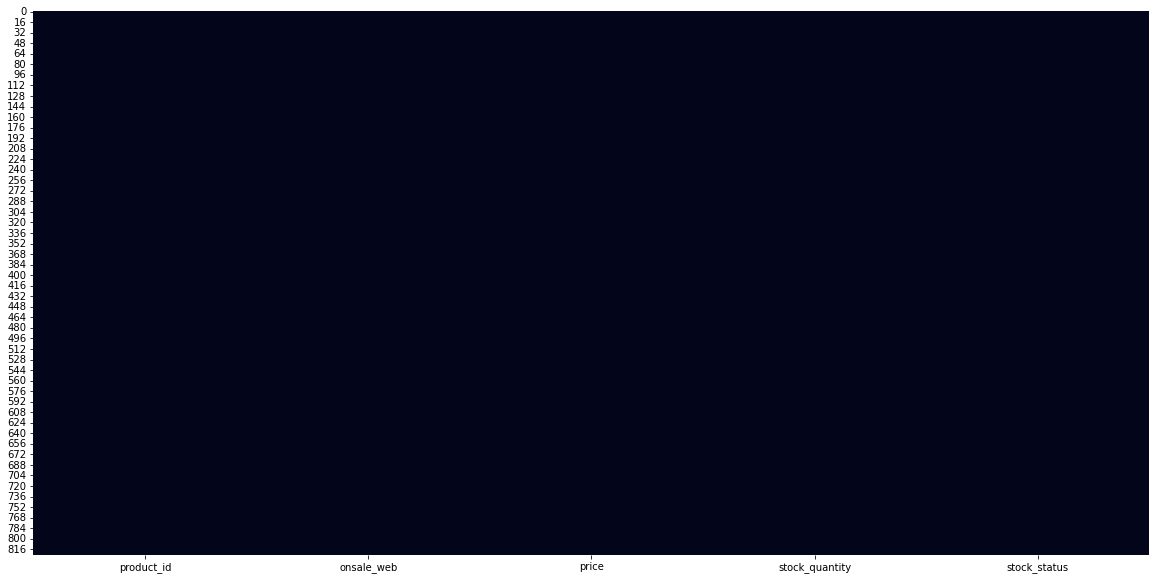

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_erp.isna(), cbar=False)

In [8]:
(df_erp.isna().sum()/df_erp.shape[0]).sort_values(ascending=True)

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

## df_ERP : Aucun NaN

In [9]:
# *************************************************************
# Chargement des données de df_liaison :

df_liaison = pd.read_excel("liaison.xlsx")

C:\Users\cyril\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<AxesSubplot:ylabel='None'>

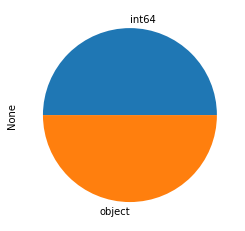

In [10]:
df_liaison.dtypes.value_counts().plot.pie()

In [11]:
df_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


# df_liaison : Visualisation des NaN

<AxesSubplot:>

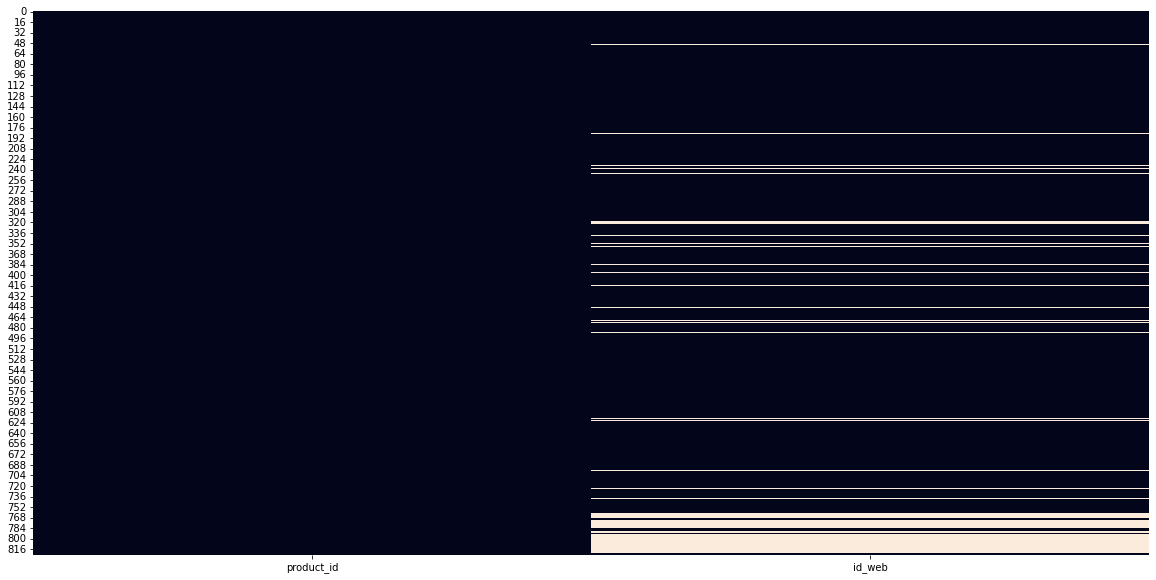

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_liaison.isna(), cbar=False)

In [13]:
(df_liaison.isna().sum()/df_liaison.shape[0]).sort_values(ascending=True)

product_id    0.000000
id_web        0.110303
dtype: float64

# - PROBLÈME REPÉRÉ ! -

# Cause : 

## table Liaison :11,03% des données de la colonne id_web vides.

# Conséquence :

## Possibilité de "stock dormant", produits en stocks sur lesquels il n'y a pas de communication web.

# Nous vérifierons ca ensuite.

In [14]:
# **************************************************************************
# Chargement des données df_web :
df_web = pd.read_excel("web.xlsx")

C:\Users\cyril\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [15]:
df_web.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<AxesSubplot:ylabel='None'>

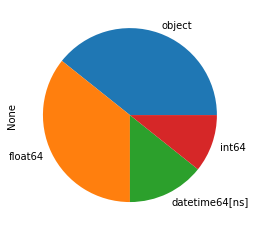

In [16]:
df_web.dtypes.value_counts().plot.pie()

# Constatation :
## Des données DateTime sont disponibles, nous pourrons peut-être extraire des informations temporelles

In [17]:
# import du module
import datetime

<AxesSubplot:ylabel='post_type'>

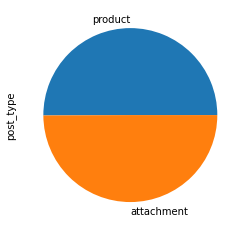

In [18]:
# Analyse des product / attachment dans df_web colonne post_type :
df_web.post_type.value_counts().plot.pie()

In [19]:
# Vérification sur colonne post_type :
df_web.post_type.unique()

# nan = Des traitements à réaliser

array(['product', nan, 'attachment'], dtype=object)

<AxesSubplot:ylabel='post_type'>

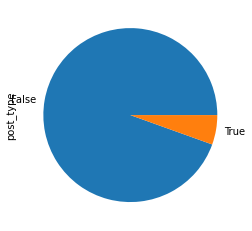

In [20]:
# Analyse des NaN dans post_type :
df_web.post_type.isna().value_counts().plot.pie()

# df_web : Visualisation des NaN 

<AxesSubplot:>

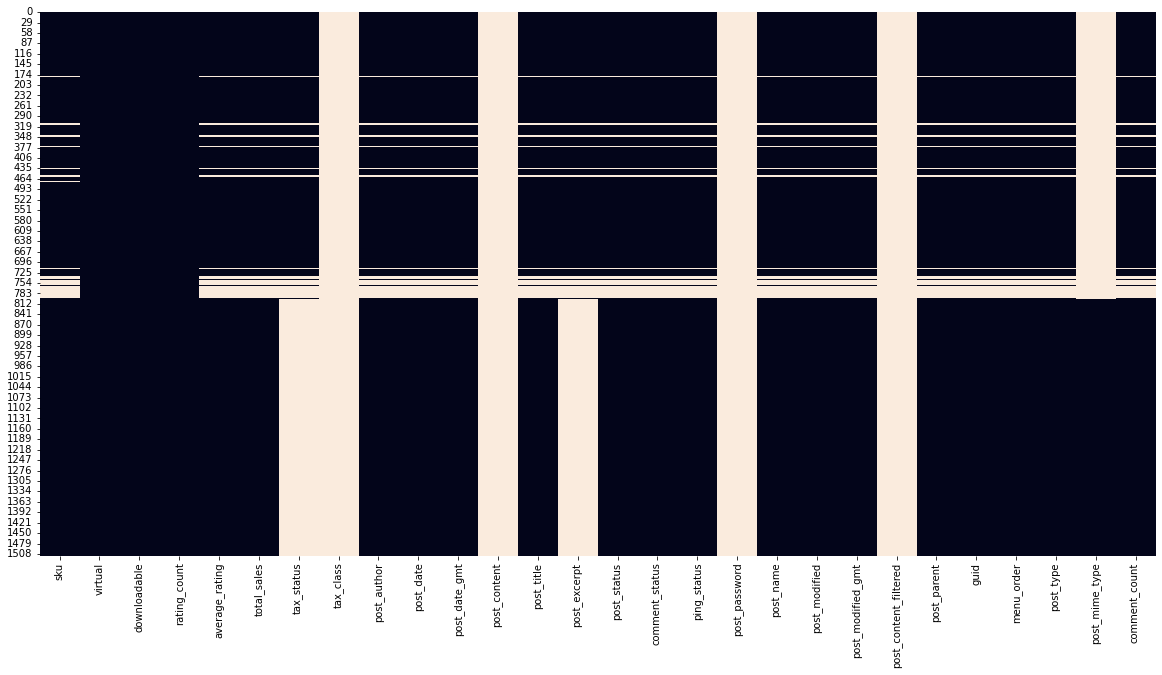

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_web.isna(), cbar=False)

In [22]:
# Des colonnes sont vides, on les traite :

In [23]:
# Comptage des % de Nan à l'intérieur des colonnes de df_web :
(df_web.isna().sum()/df_web.shape[0]).sort_values(ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

In [24]:
# Suppression des colonnes sans information :
df_web = df_web.drop(columns=['post_content_filtered','post_content','tax_class','post_password'])

In [25]:
df_web.columns
# Vérif colonnes/Extraction variables pour copier/coller fonctionnels

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'post_title', 'post_excerpt', 'post_status',
       'comment_status', 'ping_status', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type',
       'post_mime_type', 'comment_count'],
      dtype='object')

# df_web : Visualisation actualisée

<AxesSubplot:>

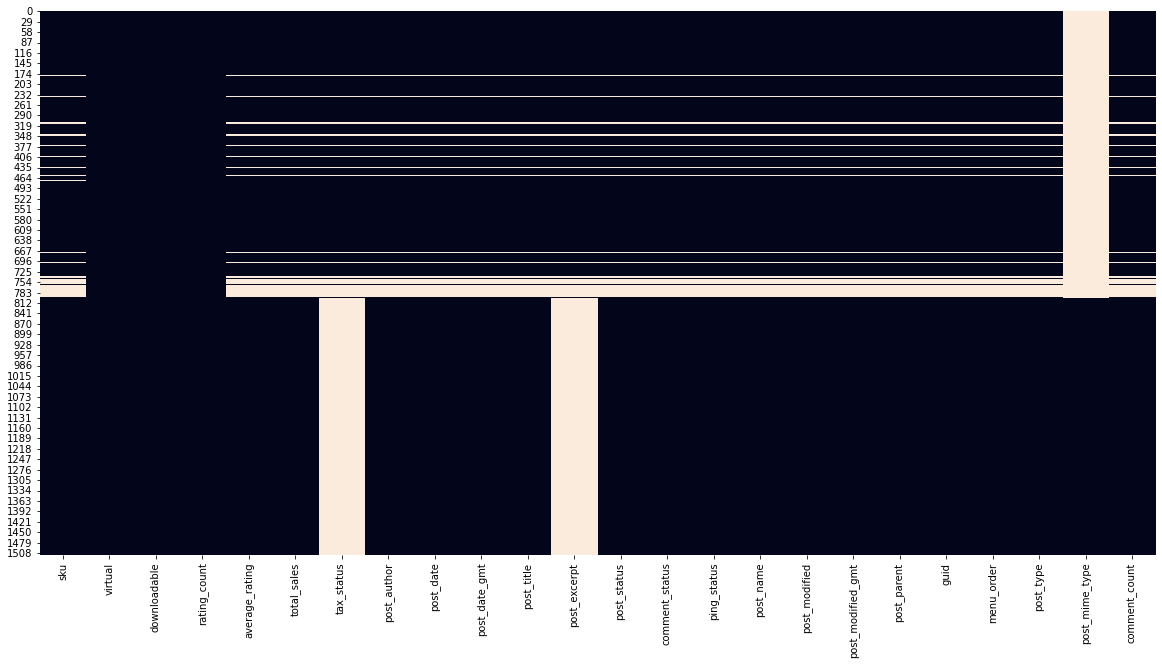

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df_web.isna(), cbar=False)

In [27]:
# On renomme la colonne sku en id_web :

df_web = df_web.rename(columns={'sku':'id_web'})

In [28]:
df_web.shape

(1513, 24)

# RECOMMANDATIONS :

In [29]:
# Extraction des product_id sans liens id_web :
df_liaisons_vides = df_liaison.loc[df_liaison.id_web.isna(),: ]
df_liaisons_vides

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [30]:
# Contrôle rapide pré-fusion :
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [31]:
# Contrôle rapide pré-fusion :
df_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
# Récupération des product_id à liens webs vides :
df_liaisons_vides.product_id

19     4055
49     4090
50     4092
119    4195
131    4209
       ... 
817    7196
818    7200
819    7201
820    7203
821    7204
Name: product_id, Length: 91, dtype: int64

In [33]:
df_liaisons_vides_verif = df_liaisons_vides.merge(df_erp,left_on = 'product_id', right_on='product_id')
df_liaisons_vides_verif

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,4055,NaN,0,86.1,0,outofstock
1,4090,NaN,0,73.0,0,outofstock
2,4092,NaN,0,47.0,0,outofstock
3,4195,NaN,0,14.1,0,outofstock
4,4209,NaN,0,73.5,0,outofstock
...,...,...,...,...,...,...
86,7196,NaN,0,31.0,55,instock
87,7200,NaN,0,31.0,6,instock
88,7201,NaN,0,31.0,18,instock
89,7203,NaN,0,45.0,30,instock


In [34]:
# Extraction des lignes présentes 

In [35]:
df_liaisons_vides_verif.sort_values(by=['stock_quantity'], inplace=True, ascending=False)
df_liaisons_vides_verif.head(35)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
38,6594,NaN,0,9.1,192,instock
67,7087,NaN,0,30.0,91,instock
30,5560,NaN,0,47.0,62,instock
86,7196,NaN,0,31.0,55,instock
52,6903,NaN,0,27.0,54,instock
68,7088,NaN,0,20.0,53,instock
78,7164,NaN,0,31.0,51,instock
47,6898,NaN,0,30.0,51,instock
14,4692,NaN,0,12.0,48,instock
81,7170,NaN,0,45.0,43,instock


In [36]:
# Calcul du CA total des produits non référencés web :
ca_produits_non_référencés_web = df_liaisons_vides_verif.stock_quantity*df_liaisons_vides_verif.price

In [37]:
ca_produits_non_référencés_web.sum()

41000.8

# 41000€ dormant sur lesquels il n'y a pas de communication web !

## Sauf si la valorisation du stockage dans le temps est plus importante que le coût du stockage il serait judicieux de mettre en vente ces produits?

In [38]:
# Recommandation de changement de nom de la variables id_web = '13127-1' en 9990001,9990002,...par exemple.
# Nécessité d'enlever les signes - pour le classement
# Ce numéro de référence représente un Chateau-Neuf-du-Pape 2007 mais comme il n'y a ni stock ni ventes pour notre analyse nous
# le retirons du DataFrame d'analyse des ventes.

# df_web.loc[df_web['id_web'] == "13127-1",:]

In [39]:
# df_web_nettoyé = df_web.loc[df_web['id_web'] != "bon-cadeau-25-euros",:]

In [40]:
# df_web_nettoyé.shape

In [41]:
# df_web_nettoyé = df_web_nettoyé.loc[df_web_nettoyé['id_web'] != "13127-1",:]

In [42]:
# df_web_nettoyé.shape

In [43]:
# df_web_nettoyé.id_web.astype(float)

In [44]:
# df_web_nettoyé.shape

In [45]:
# df_web_nettoyé = df_web_nettoyé.sort_values('id_web',ascending=True)

In [46]:
# df_web_nettoyé.shape

In [47]:
# df_web_nettoyé.columns

In [48]:
# df_web_nettoyé

In [49]:
df_web_nettoyé = df_web
df_web_nettoyé = df_web_nettoyé.drop(columns=['menu_order','comment_count','post_mime_type','post_parent'])

In [50]:
df_web_nettoyé = df_web_nettoyé.drop(columns=['ping_status','comment_status','post_status','post_modified'])

In [51]:
df_web_nettoyé = df_web_nettoyé.loc[df_web_nettoyé['post_type'] == "product", :]

In [52]:
df_web_nettoyé.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


<AxesSubplot:>

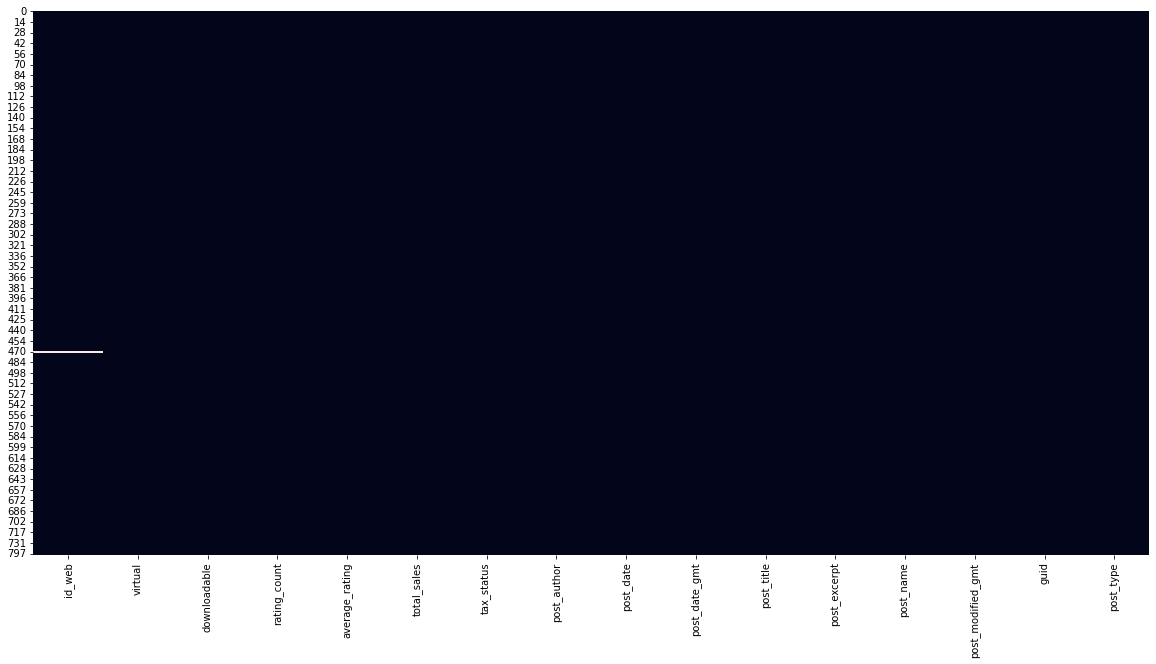

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df_web_nettoyé.isna(), cbar=False)

In [54]:
# Des produits ressortent sans avoir d'id_web :

df_web_nettoyé.loc[df_web_nettoyé['id_web'].isna(),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [55]:
# Suppression des lignes vides :
df_web_nettoyé = df_web_nettoyé.drop(index = 470)
df_web_nettoyé = df_web_nettoyé.drop(index = 471)

In [56]:
df_web_nettoyé.loc[df_web_nettoyé['id_web'].isna(),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type


In [57]:
# Suppression des id_web vides.

<AxesSubplot:>

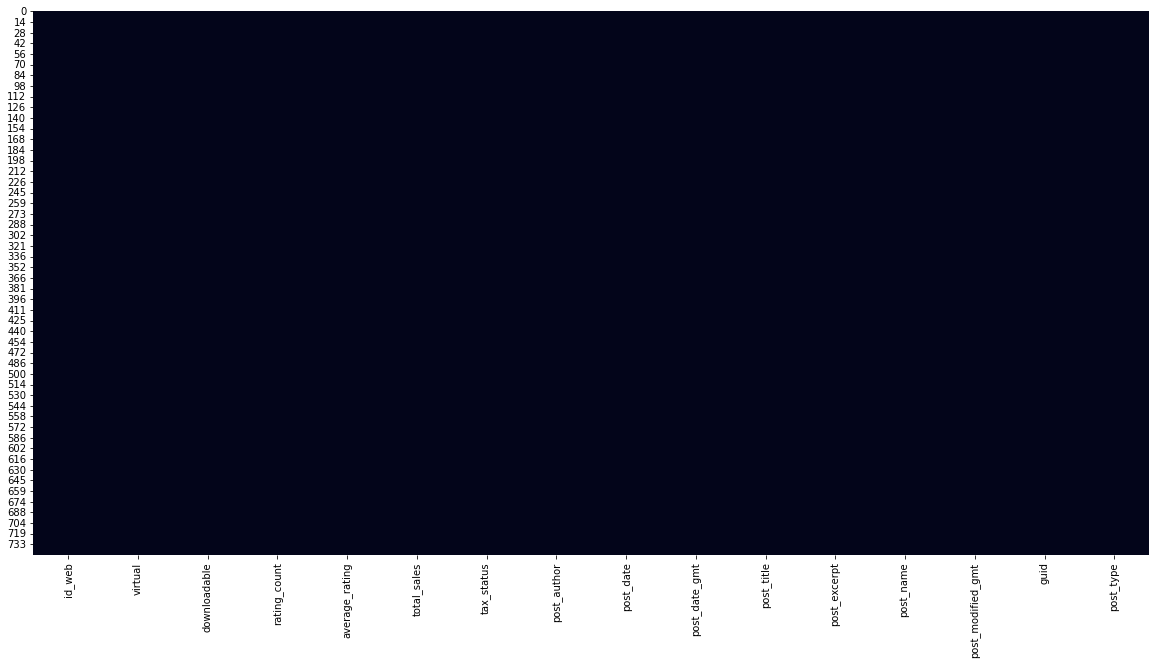

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df_web_nettoyé.isna(), cbar=False)

## Vérifications avant fusion des tables :

### web :

In [59]:
# Vérifications du nombre d'id_web différentes dans df_web :
df_web_nettoyé.id_web.unique().shape

(714,)

### erp :

In [60]:
# Vérifications du nombre de product_id différentes dans df_erp :
df_erp.product_id.unique().shape

(825,)

### liaison :

In [61]:
# Vérifications du nombre de product_id différentes dans df_liaison :
df_liaison.product_id.unique().shape

(825,)

In [62]:
# Vérifications du nombre d'id_web différentes dans df_liaison :
df_liaison.id_web.unique().shape

(735,)

# Fusion des tables :

In [63]:
df_erp_liaison = df_erp.merge(df_liaison, left_on='product_id', right_on='product_id')

In [64]:
df_erp_liaison.shape

(825, 6)

In [65]:
df_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [66]:
df_erp_liaison = df_erp_liaison.reindex(columns = ['product_id','id_web','stock_quantity','price','stock_status','onsale_web'])

<AxesSubplot:ylabel='post_type'>

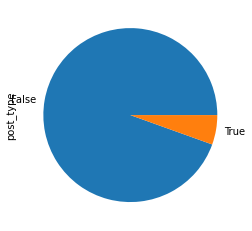

In [67]:
df_web.post_type.isna().value_counts().plot.pie()

<AxesSubplot:ylabel='id_web'>

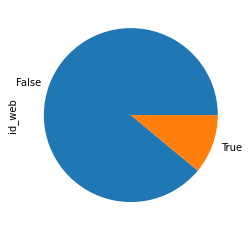

In [68]:
df_erp_liaison.id_web.isna().value_counts().plot.pie()

### Réalisation de la connexion entre df_erp et df_liaison réalisée.

## Réalisation de la connexion entre df_erp_liaison et df_web :

In [69]:
df_web_nettoyé.shape

(714, 16)

In [70]:
df_web_nettoyé.id_web.unique().shape

(714,)

In [71]:
df_web_nettoyé.count()

id_web               714
virtual              714
downloadable         714
rating_count         714
average_rating       714
total_sales          714
tax_status           714
post_author          714
post_date            714
post_date_gmt        714
post_title           714
post_excerpt         714
post_name            714
post_modified_gmt    714
guid                 714
post_type            714
dtype: int64

In [72]:
df_erp_liaison_web = pd.merge(df_erp_liaison, df_web_nettoyé, on="id_web").sort_values(by='total_sales',ascending=False)
df_erp_liaison_web.head(2)

,product_id,id_web,stock_quantity,price,stock_status,onsale_web,virtual,downloadable,rating_count,average_rating,...,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type
194,4334,7818,0,49.0,outofstock,1,0,0,0,0.0,...,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product
71,4144,1662,11,49.0,instock,1,0,0,0,0.0,...,taxable,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product


In [73]:
df_erp_liaison_web.columns

Index(['product_id', 'id_web', 'stock_quantity', 'price', 'stock_status',
       'onsale_web', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'post_date_gmt', 'post_title', 'post_excerpt', 'post_name',
       'post_modified_gmt', 'guid', 'post_type'],
      dtype='object')

# Choix de l'ordre des colonnes pour y voir plus clair :

In [74]:
df_erp_liaison_web.reindex(columns=['product_id', 'id_web','stock_quantity','price','total_sales','onsale_web','post_date_gmt','post_title','post_excerpt','guid'])

,product_id,id_web,stock_quantity,price,total_sales,onsale_web,post_date_gmt,post_title,post_excerpt,guid
194,4334,7818,0,49.0,96.0,1,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,https://www.bottle-neck.fr/?post_type=product&...
71,4144,1662,11,49.0,87.0,1,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",https://www.bottle-neck.fr/?post_type=product&...
30,4068,16416,157,16.6,62.0,1,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",https://www.bottle-neck.fr/?post_type=product&...
119,4200,16295,190,5.8,46.0,1,2018-02-15 13:05:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,"Rosé très agréable, intense, floral et minéral...",https://www.bottle-neck.fr/?post_type=product&...
97,4172,16210,167,5.7,43.0,1,2018-02-14 15:54:33,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...,...,...
352,4791,14599,24,13.6,0.0,1,2018-04-19 12:31:41,Maurice Schoech Pinot Noir Pièce de Chêne 2016,Cette cuvée est issue d’une sélection des plus...,https://www.bottle-neck.fr/?post_type=product&...
351,4790,15732,43,11.1,0.0,1,2018-04-19 12:25:00,Maurice Schoech Riesling 2018,"Un Riesling plein de fruits frais, sec et racé...",https://www.bottle-neck.fr/?post_type=product&...
348,4786,15881,37,12.1,0.0,1,2018-04-19 11:52:18,Maurice Schoech Gewurztraminer 2018,Ce sont des vignes âgées situées autour d’Amme...,https://www.bottle-neck.fr/?post_type=product&...
346,4784,15734,10,28.5,0.0,1,2018-04-19 11:46:52,Maurice Schoech Riesling Vendanges Tardives 2017,Ces raisins ont été récoltés en trois tris ave...,https://www.bottle-neck.fr/?post_type=product&...


# Jeu de données prêt à l'exploitation : df_erp_liaison_web

<AxesSubplot:>

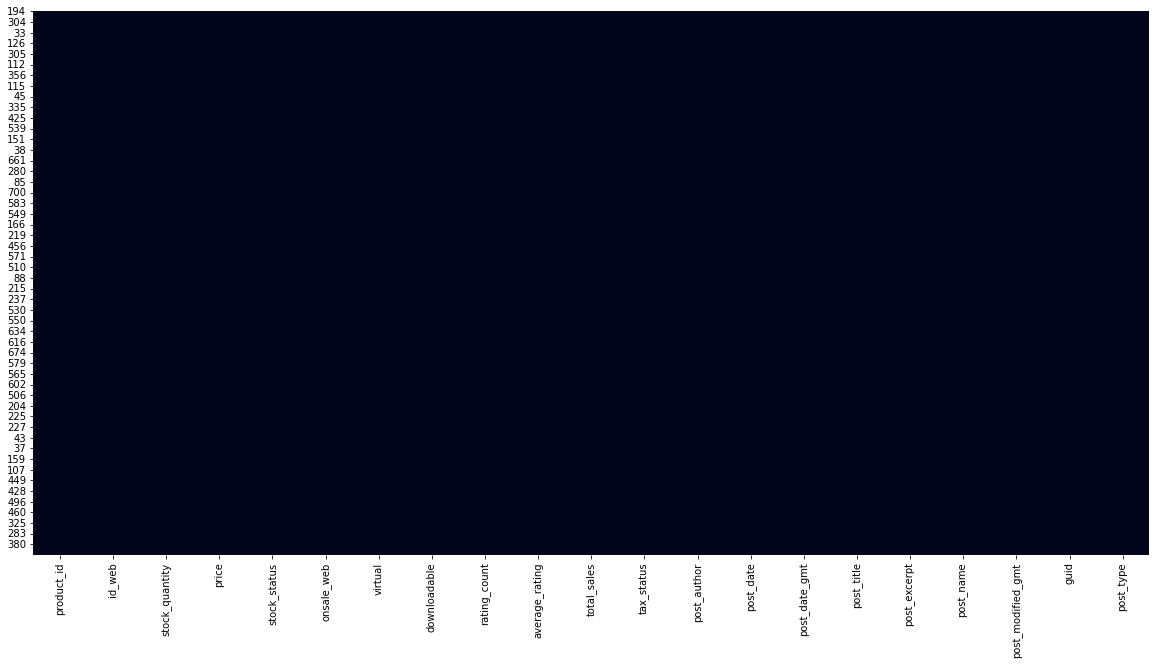

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df_erp_liaison_web.isna(), cbar=False)

In [76]:
df_erp_liaison_web

,product_id,id_web,stock_quantity,price,stock_status,onsale_web,virtual,downloadable,rating_count,average_rating,...,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type
194,4334,7818,0,49.0,outofstock,1,0,0,0,0.0,...,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product
71,4144,1662,11,49.0,instock,1,0,0,0,0.0,...,taxable,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product
30,4068,16416,157,16.6,instock,1,0,0,0,0.0,...,taxable,2.0,2018-02-12 13:42:28,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 14:05:04,https://www.bottle-neck.fr/?post_type=product&...,product
119,4200,16295,190,5.8,instock,1,0,0,0,0.0,...,taxable,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,"Rosé très agréable, intense, floral et minéral...",moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 16:55:03,https://www.bottle-neck.fr/?post_type=product&...,product
97,4172,16210,167,5.7,instock,1,0,0,0,0.0,...,taxable,2.0,2018-02-14 16:54:33,2018-02-14 15:54:33,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,maurel-pays-oc-chardonnay-2019,2020-08-27 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,4791,14599,24,13.6,instock,1,0,0,0,0.0,...,taxable,2.0,2018-04-19 14:31:41,2018-04-19 12:31:41,Maurice Schoech Pinot Noir Pièce de Chêne 2016,Cette cuvée est issue d’une sélection des plus...,maurice-schoech-pinot-noir-piece-de-chene-2016,2020-07-07 15:05:02,https://www.bottle-neck.fr/?post_type=product&...,product
351,4790,15732,43,11.1,instock,1,0,0,0,0.0,...,taxable,2.0,2018-04-19 14:25:00,2018-04-19 12:25:00,Maurice Schoech Riesling 2018,"Un Riesling plein de fruits frais, sec et racé...",maurice-schoech-riesling-2018,2020-08-24 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
348,4786,15881,37,12.1,instock,1,0,0,0,0.0,...,taxable,2.0,2018-04-19 13:52:18,2018-04-19 11:52:18,Maurice Schoech Gewurztraminer 2018,Ce sont des vignes âgées situées autour d’Amme...,maurice-schoech-gewurztraminer-2018,2020-08-27 15:55:02,https://www.bottle-neck.fr/?post_type=product&...,product
346,4784,15734,10,28.5,instock,1,0,0,0,0.0,...,taxable,2.0,2018-04-19 13:46:52,2018-04-19 11:46:52,Maurice Schoech Riesling Vendanges Tardives 2017,Ces raisins ont été récoltés en trois tris ave...,maurice-schoech-riesling-vendanges-tardives-2017,2020-08-20 07:30:12,https://www.bottle-neck.fr/?post_type=product&...,product


In [77]:
df_erp_liaison_web["Totaux_des_ventes_par_produit"] = df_erp_liaison_web['price']*df_erp_liaison_web['total_sales']

In [78]:
df_erp_liaison_web = df_erp_liaison_web.sort_values("Totaux_des_ventes_par_produit", ascending = False)

# On organise une dernière fois nos données :

In [79]:
df_erp_liaison_web.reindex(columns=['product_id', 'id_web','Totaux_des_ventes_par_produit','stock_quantity','price','total_sales','onsale_web','post_date_gmt','post_title','post_excerpt','guid'])

,product_id,id_web,Totaux_des_ventes_par_produit,stock_quantity,price,total_sales,onsale_web,post_date_gmt,post_title,post_excerpt,guid
194,4334,7818,4704.0,0,49.0,96.0,1,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,https://www.bottle-neck.fr/?post_type=product&...
71,4144,1662,4263.0,11,49.0,87.0,1,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",https://www.bottle-neck.fr/?post_type=product&...
218,4402,3510,2288.0,8,176.0,13.0,1,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,https://www.bottle-neck.fr/?post_type=product&...
70,4142,11641,1590.0,8,53.0,30.0,1,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",https://www.bottle-neck.fr/?post_type=product&...
69,4141,304,1560.0,1,39.0,40.0,1,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...,...,...,...
599,5912,15227,0.0,8,57.0,0.0,1,2019-04-04 13:36:52,Kingsbarns Distillery Lowland Single Malt Whisky,"<span title="""">Dream to Dram, un caractère rem...",https://www.bottle-neck.fr/?post_type=product&...
600,5913,10014,0.0,9,36.0,0.0,1,2019-04-04 13:45:23,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",https://www.bottle-neck.fr/?post_type=product&...
602,5916,14774,0.0,3,93.0,0.0,1,2019-04-04 14:39:24,Wemyss Malts Single Cask Scotch Whisky Chocola...,"305 bouteilles, 13 ans d'âge.\n\n<span title=""...",https://www.bottle-neck.fr/?post_type=product&...
603,5917,14775,0.0,4,122.0,0.0,1,2019-04-04 14:49:37,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,"710 bouteilles, 17 ans d'âge.\n\n<span title=""...",https://www.bottle-neck.fr/?post_type=product&...


In [80]:
CA_TOTAL_EN_LIGNE = df_erp_liaison_web["Totaux_des_ventes_par_produit"].sum()
CA_TOTAL_EN_LIGNE

70568.6

# CA Total :   70 568,60 €      sur les ventes en ligne

In [81]:
VALEUR_STOCK_TOTAL = (df_erp_liaison_web["stock_quantity"]*df_erp_liaison_web["price"]).sum()
VALEUR_STOCK_TOTAL

387837.6

# Valeur du stock total extraite sur base des données fournies : 387 837,60 € 

In [82]:
# ***************************************************************************************************************************

# Recherche d'outliers / d'anormalitées :

In [83]:
# Détection d'outliers :

In [84]:
max_minmax = df_erp_liaison_web['price'].max()
max_minmax

225.0

In [85]:
#df_erp_liaison_web['price_norma'] = df_erp_liaison_web['price']/max_minmax

In [86]:
# Erreurs de saisie : product_id  7201, 7203, 7204

# Normalisation des données :

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

### Analyses avec MinMaxScaler :

In [88]:
X = df_erp_liaison_web['price']
X = X.array.reshape(-1, 1)

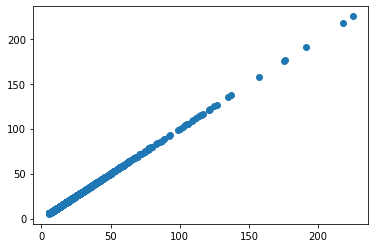

In [89]:
X_minmax = MinMaxScaler().fit_transform(X)
plt.scatter(X, X)

### Analyses au Standart Scaler :

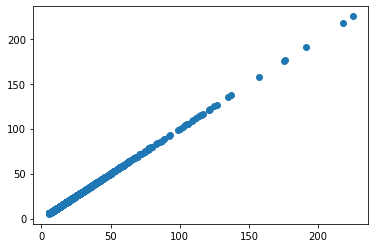

In [90]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X, X)

### Analyses au RobustScaler :

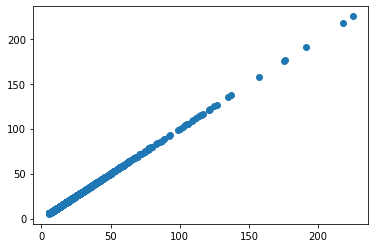

In [91]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X, X)

In [92]:
# Calculating summary statistics
mean, std = df_erp_liaison_web["price"].mean(), df_erp_liaison_web["price"].std()

# Identifying outliers
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
outliers = [x for x in df_erp_liaison_web["price"] if x < lower or x > upper]

In [93]:
outliers

[176.0,
 126.5,
 225.0,
 137.0,
 191.3,
 135.0,
 217.5,
 116.4,
 121.0,
 121.0,
 124.8,
 175.0,
 157.0,
 122.0]

In [94]:
# Extraction pour traitement de la liste des éléments anormaux / outliers :
Liste_outliers_potentiels = df_erp_liaison_web.loc[df_erp_liaison_web['price'] >= 116.4,:]
Liste_outliers_potentiels = Liste_outliers_potentiels.sort_values('price',ascending=True)
df_Liste_outliers_potentiels = Liste_outliers_potentiels

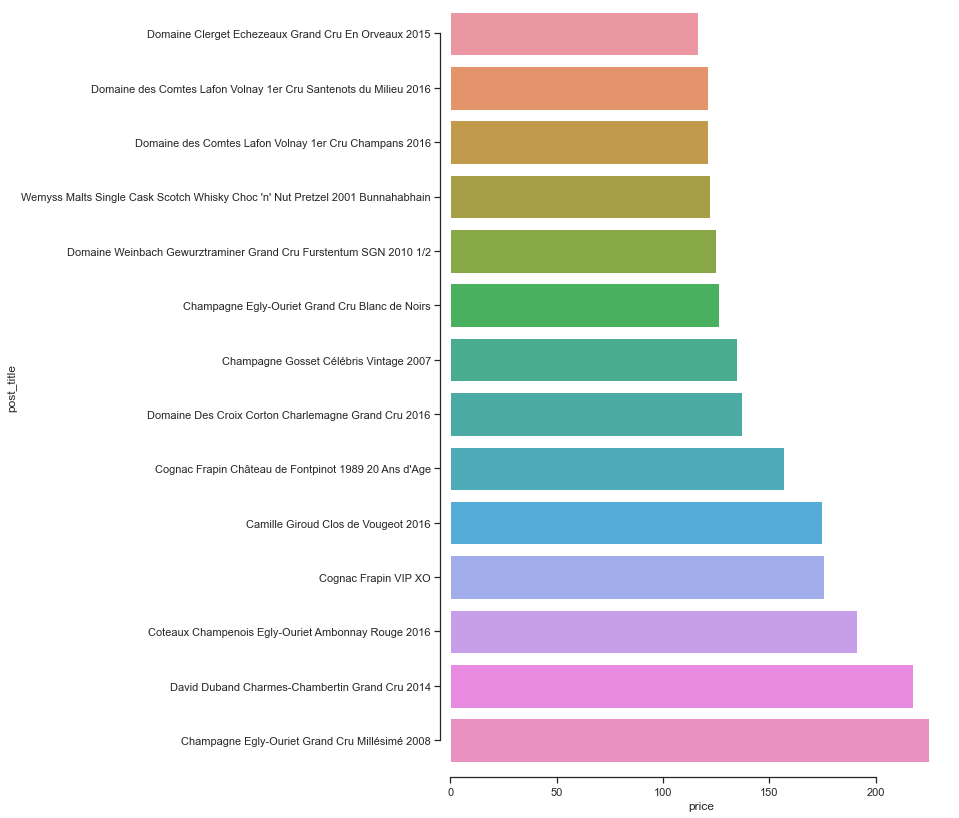

In [95]:
# Visualisation des outliers potentiels :
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(9,14))
sns.barplot(x="price", y="post_title",
            data=Liste_outliers_potentiels)
sns.despine(offset=10, trim=True)

# Ajouter un titre

In [96]:
# position moyenne des outliers par rapport aux autres produits :

In [97]:
df_erp_liaison_web['quantile'] = df_erp_liaison_web.price.quantile([.05, .10, .15, .20, .25, .30, .35, .40, .45, .50, .55, .60, .65, .70, .75,.80,.85,.90,.95,1])
df_erp_liaison_web

,product_id,id_web,stock_quantity,price,stock_status,onsale_web,virtual,downloadable,rating_count,average_rating,...,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type,Totaux_des_ventes_par_produit,quantile
194,4334,7818,0,49.0,outofstock,1,0,0,0,0.0,...,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,4704.0,NaN
71,4144,1662,11,49.0,instock,1,0,0,0,0.0,...,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,4263.0,NaN
218,4402,3510,8,176.0,instock,1,0,0,0,0.0,...,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,2288.0,NaN
70,4142,11641,8,53.0,instock,1,0,0,0,0.0,...,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,1590.0,NaN
69,4141,304,1,39.0,instock,1,0,0,0,0.0,...,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,1560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5912,15227,8,57.0,instock,1,0,0,0,0.0,...,2019-04-04 15:36:52,2019-04-04 13:36:52,Kingsbarns Distillery Lowland Single Malt Whisky,"<span title="""">Dream to Dram, un caractère rem...",whisky-kingsbarns-lowland-single-malt,2019-12-07 16:50:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN
600,5913,10014,9,36.0,instock,1,0,0,0,0.0,...,2019-04-04 15:45:23,2019-04-04 13:45:23,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",darnleys-london-dry-gin-original,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN
602,5916,14774,3,93.0,instock,1,0,0,0,0.0,...,2019-04-04 16:39:24,2019-04-04 14:39:24,Wemyss Malts Single Cask Scotch Whisky Chocola...,"305 bouteilles, 13 ans d'âge.\n\n<span title=""...",wemyss-malts-single-cask-chocolate-moka-cake,2019-12-23 08:30:21,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN
603,5917,14775,4,122.0,instock,1,0,0,0,0.0,...,2019-04-04 16:49:37,2019-04-04 14:49:37,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,"710 bouteilles, 17 ans d'âge.\n\n<span title=""...",wemyss-malts-single-cask-scotch-whisky-choc-n-...,2020-03-11 08:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN


In [103]:
df_erp_liaison_web.columns

Index(['product_id', 'id_web', 'stock_quantity', 'price', 'stock_status',
       'onsale_web', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'post_date_gmt', 'post_title', 'post_excerpt', 'post_name',
       'post_modified_gmt', 'guid', 'post_type',
       'Totaux_des_ventes_par_produit', 'quantile'],
      dtype='object')

In [115]:
df_erp_liaison_web['date_column'] = pd.to_datetime(df_erp_liaison_web['post_date']).dt.date
df_erp_liaison_web.columns

Index(['product_id', 'id_web', 'stock_quantity', 'price', 'stock_status',
       'onsale_web', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'post_author',
       'post_date', 'post_date_gmt', 'post_title', 'post_excerpt', 'post_name',
       'post_modified_gmt', 'guid', 'post_type',
       'Totaux_des_ventes_par_produit', 'quantile', 'date_column'],
      dtype='object')

In [116]:
df_erp_liaison_web.date_column

194    2018-03-01
71     2018-02-13
218    2018-03-22
70     2018-02-13
69     2018-02-13
          ...    
599    2019-04-04
600    2019-04-04
602    2019-04-04
603    2019-04-04
713    2020-07-20
Name: date_column, Length: 714, dtype: object

# Affichage de la répartition des prix de vente :

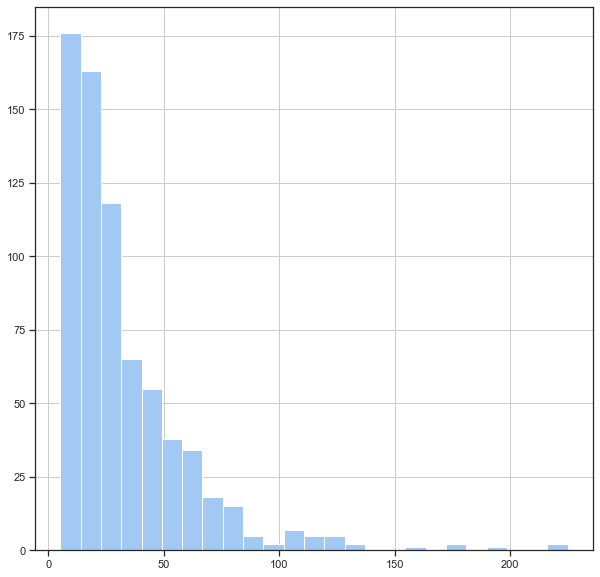

In [98]:
plt.figure(figsize=(10,10))
df_erp_liaison_web["price"].hist(bins=25)
plt.show()

In [ ]:
sns.catplot(x='post_date', y='price', data=df_erp_liaison_web, hue=(df_erp_liaison_web['price']=outliers))

<AxesSubplot:xlabel='product_id', ylabel='price'>

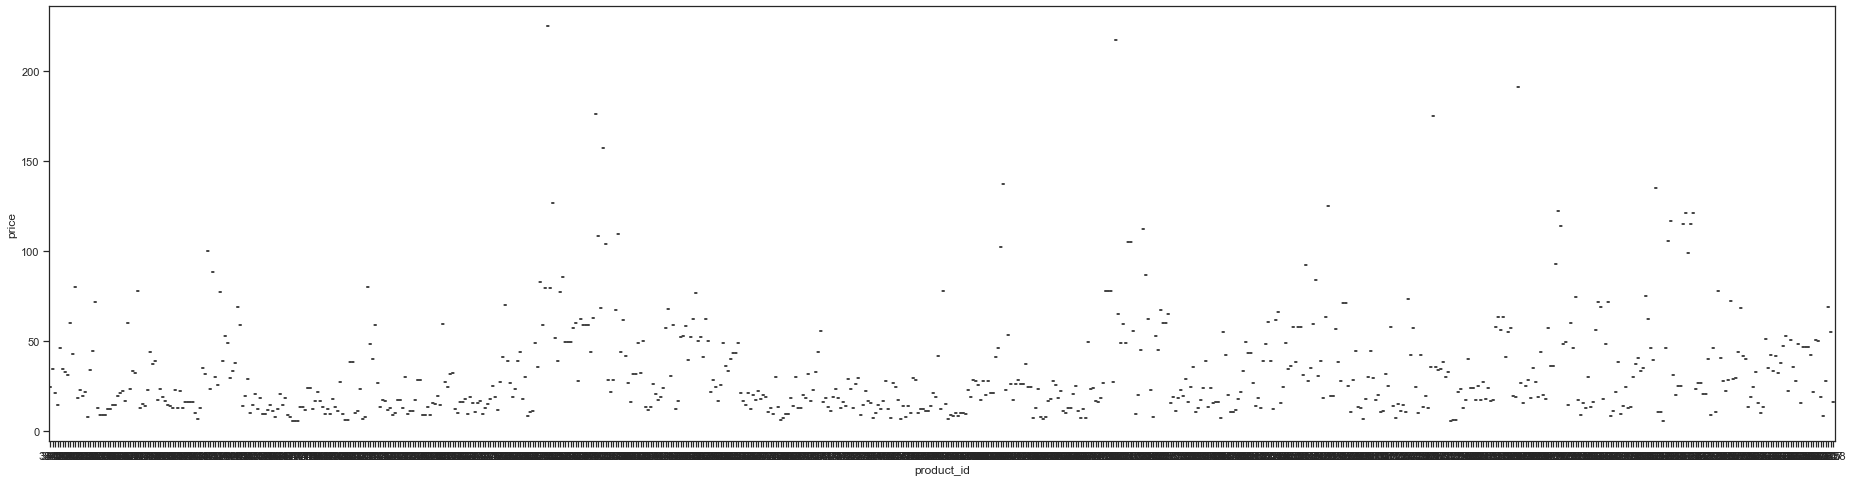

In [128]:
plt.figure(figsize=(32, 8))
sns.boxplot(x='product_id', y='price', data=df_erp_liaison_web)

<AxesSubplot:xlabel='price', ylabel='price'>

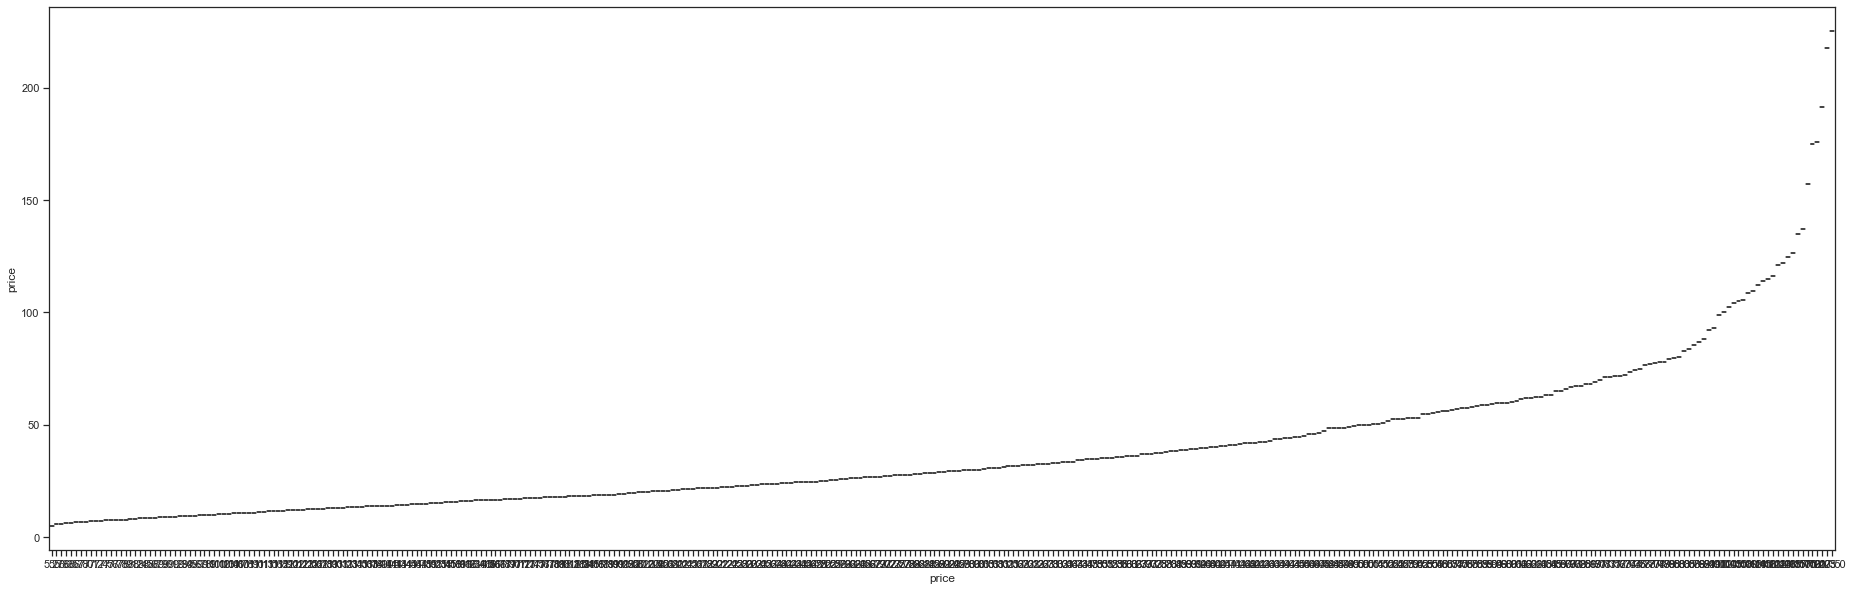

In [134]:
plt.figure(figsize=(32, 10))
sns.boxplot(x='price', y='price', data=df_erp_liaison_web)

<AxesSubplot:xlabel='post_type', ylabel='price'>

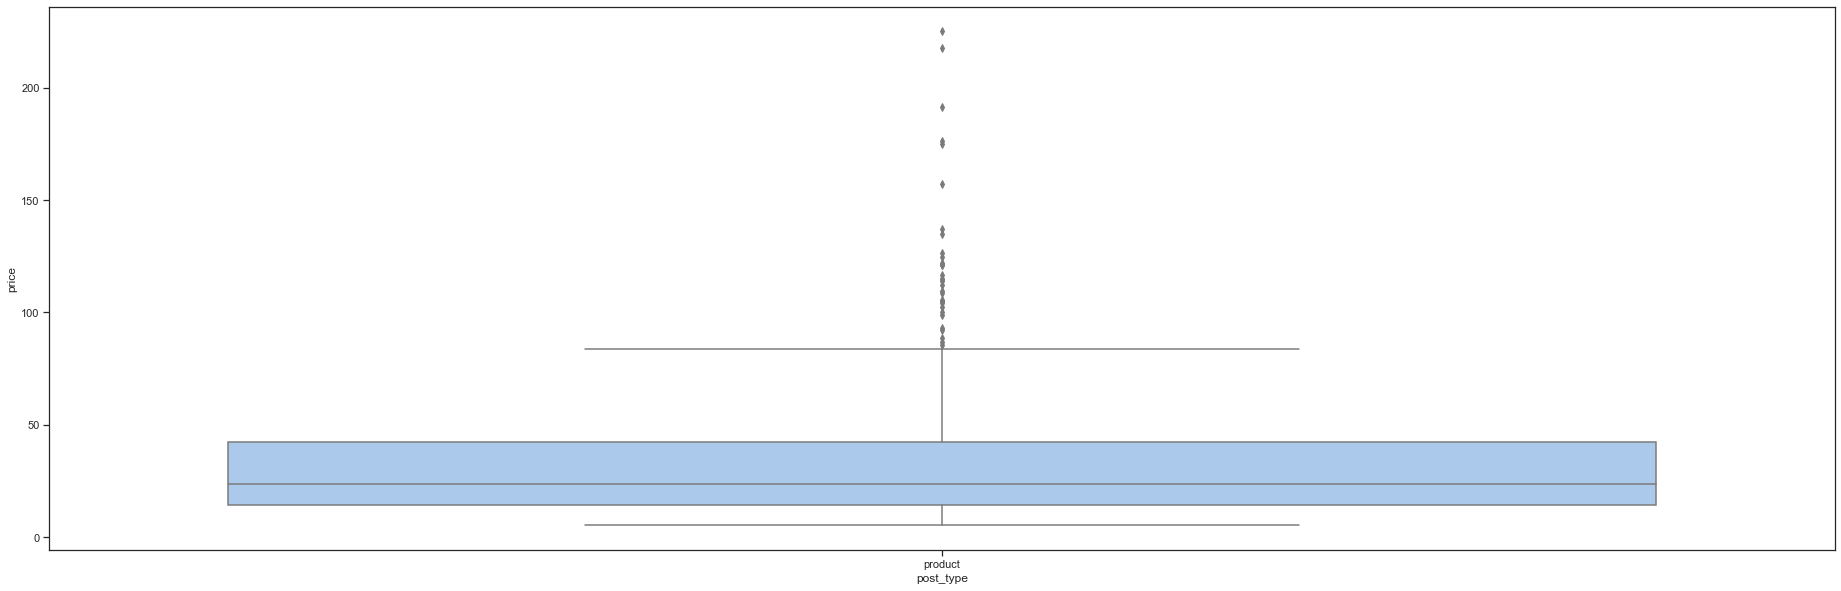

In [138]:
plt.figure(figsize=(32, 10))
sns.boxplot(x='post_type', y='price', data=df_erp_liaison_web)

# Après visualisations nous pouvons affirmer que les outliers ont l'air de valeurs atypiques et non aberrantes.

In [118]:
# Fin de réponses aux question sur les fusions, CA et anormalitées.
#
# *************************************************************************************
# *************************************************************************************

# Présentation COPIL progès réalisés :

In [119]:
df_erp_liaison_web

,product_id,id_web,stock_quantity,price,stock_status,onsale_web,virtual,downloadable,rating_count,average_rating,...,post_date_gmt,post_title,post_excerpt,post_name,post_modified_gmt,guid,post_type,Totaux_des_ventes_par_produit,quantile,date_column
194,4334,7818,0,49.0,outofstock,1,0,0,0,0.0,...,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,4704.0,NaN,2018-03-01
71,4144,1662,11,49.0,instock,1,0,0,0,0.0,...,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,4263.0,NaN,2018-02-13
218,4402,3510,8,176.0,instock,1,0,0,0,0.0,...,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,2288.0,NaN,2018-03-22
70,4142,11641,8,53.0,instock,1,0,0,0,0.0,...,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,1590.0,NaN,2018-02-13
69,4141,304,1,39.0,instock,1,0,0,0,0.0,...,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,1560.0,NaN,2018-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,5912,15227,8,57.0,instock,1,0,0,0,0.0,...,2019-04-04 13:36:52,Kingsbarns Distillery Lowland Single Malt Whisky,"<span title="""">Dream to Dram, un caractère rem...",whisky-kingsbarns-lowland-single-malt,2019-12-07 16:50:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN,2019-04-04
600,5913,10014,9,36.0,instock,1,0,0,0,0.0,...,2019-04-04 13:45:23,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",darnleys-london-dry-gin-original,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN,2019-04-04
602,5916,14774,3,93.0,instock,1,0,0,0,0.0,...,2019-04-04 14:39:24,Wemyss Malts Single Cask Scotch Whisky Chocola...,"305 bouteilles, 13 ans d'âge.\n\n<span title=""...",wemyss-malts-single-cask-chocolate-moka-cake,2019-12-23 08:30:21,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN,2019-04-04
603,5917,14775,4,122.0,instock,1,0,0,0,0.0,...,2019-04-04 14:49:37,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,"710 bouteilles, 17 ans d'âge.\n\n<span title=""...",wemyss-malts-single-cask-scotch-whisky-choc-n-...,2020-03-11 08:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,0.0,NaN,2019-04-04


In [120]:
# Malgré la "volonté de m'épargner une présentation en Data Visualisation" j'ai tout de même pris le temps de la réaliser
# car la pertinence des diagrammes intéractifs pour un comité de pilotage me paraissait essentiel.

In [126]:
df_erp_liaison_web_avec_date = df_erp_liaison_web
datatoexcel = df_erp_liaison_web_avec_date

datatoexcel = pd.ExcelWriter('df_erp_liaison_web_avec_date.xlsx') 
  
df_erp_liaison_web_avec_date.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [122]:
# extraction dataframe df_Liste_outliers_potentiels

datatoexcel = df_Liste_outliers_potentiels

datatoexcel = pd.ExcelWriter('df_Liste_outliers_potentiels.xlsx') 
  
df_Liste_outliers_potentiels.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


In [123]:
# extraction dataframe df_liaisons_vides_verif

datatoexcel = df_liaisons_vides_verif

datatoexcel = pd.ExcelWriter('df_liaisons_vides_verif.xlsx') 
  
df_liaisons_vides_verif.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


In [103]:
# Suite sous Microsoft Power BI - Pour toutes questions/modifications : cyril.bgs.dev@gmail.com